# Module 7 Assignment

A few things you should keep in mind when working on assignments:

1. Run the first code cell to import modules needed by this assignment before proceeding to problems.
2. Make sure you fill in any place that says `# YOUR CODE HERE`. Do not write your answer anywhere else other than where it says `# YOUR CODE HERE`. Anything you write elsewhere will be removed or overwritten by the autograder.
3. Each problem has an autograder cell below the answer cell. Run the autograder cell to check your answer. If there's anything wrong in your answer, the autograder cell will display error messages.
4. Before you submit your assignment, make sure everything runs as expected. Go to the menubar, select Kernel, and Restart & Run all. If the notebook runs through the last code cell without an error message, you've answered all problems correctly.
5. Make sure that you save your work (in the menubar, select File → Save and CheckPoint).

-----

# Run Me First!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from nose.tools import assert_equal, assert_almost_equal, assert_true, assert_is_instance

# We do this to ignore warnings
import warnings
warnings.filterwarnings("ignore")

---
# Prepare Breast Cancer Data

In this assignment we will use the breast cancer dataset to perform cluster finding. Before we attempt to build models, we first prepare the data.

Please run the next two Code cells before proceeding to Problem 1.



In [2]:
from sklearn.preprocessing import LabelEncoder
#Load breast cancer dataset
df = pd.read_csv('data/breast-cancer-wisconsin.csv')
data = df[['clump thickness', 'uniformity cell size', 'uniformity cell shape', 'marginal adhesion', 'epithelial cell size', 'bare nuclei', 'bland chromatin', 'normal nucleoli', 'mitoses']]
label = LabelEncoder().fit_transform(df['class'])

data.sample()

,clump thickness,uniformity cell size,uniformity cell shape,marginal adhesion,epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses
518,3,1,1,1,2,1,2,1,1


---
# Problem 1: Standardize Features

For this problem you will use the DataFrame **data** created above.

To solve this problem do the following:
- Use `StandardScaler` to standardize `data` and assign normalized data to variable **data_ss**.

After this problem, there's a new variable **data_ss** defined.

---

In [3]:
from sklearn.preprocessing import StandardScaler
### BEGIN SOLUTION
data_ss = StandardScaler().fit_transform(data)
### END SOLUTION

In [4]:
assert_almost_equal(data_ss[0,0], 0.19790469484926235, msg='data_ss is not correct')
assert_almost_equal(data_ss[0,-1], -0.3483997074310662, msg='data_ss is not correct')
print('Sample Standardized data:')
print(data_ss[:2])

Sample Standardized data:
[[ 0.19790469 -0.70221201 -0.74177362 -0.63936553 -0.5556085  -0.69885309
  -0.18182716 -0.61292736 -0.34839971]
 [ 0.19790469  0.27725185  0.26278299  0.75803177  1.69516613  1.77286724
  -0.18182716 -0.28510482 -0.34839971]]


---
# Problem 2: Prepare Data for Elbow Plot

Prepare data to plot Elbow plot.

For this problem you will use **data_ss** created in problem 1.

To solve this problem do the following:
- Create variable **n_clusters** and set it to a numpy array with number 1 to 10.(Hint: `np.arange(1,11)`).
- Create variable **distances** to hold total distances for each number of clusters. The numpy array should have same length as n_clusters. Set initial value to 0.(Hint: `np.zeros(n_clusters.shape[0])`.
- Iterate through n_clusters, for each number of clusters:
 - Create a `KMeans` model with `n_clusters` equals to number of clusters, set `n_init` to 10, `random_state` to 23.
 - Fit the KMeans model on `data_ss`.
 - Get total distance from the KMeans model's `inertia_` attribute and assign it to corresponding location in `distances` array.

After this problem, there are two new variables, **n_clusters** and  __distances__ defined. We will use these two variables to plot the Elbow plot in the autograder cell.

---

In [5]:
from sklearn.cluster import KMeans

### BEGIN SOLUTION
# Search for best number of clusters, from one to ten
n_clusters = np.arange(1, 11)
distances = np.zeros(n_clusters.shape[0])

# Perform k-means clustering for different numbers of clusters
# Use the inertia (or sum of total distances between points
# and cluster centers) as the performance metric.
for idx, nc in enumerate(n_clusters):
    # We build our model for nc clusters
    model = KMeans(n_clusters=nc, n_init=10, random_state=23)
    model.fit(data_ss)
    distances[idx] = model.inertia_
### END SOLUTION

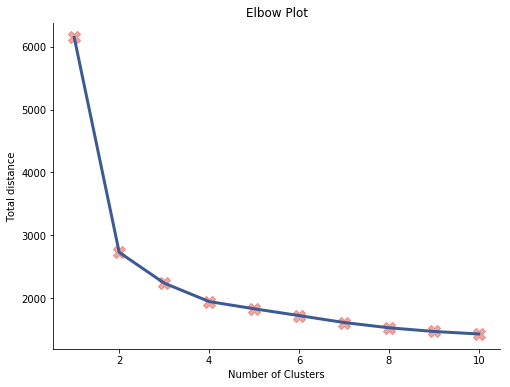

In [6]:
assert_equal(list(n_clusters), [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], msg='n_clusters is not correct.')
assert_equal(distances.shape[0], 10, msg='distances is not an array with 10 values')
assert_almost_equal(distances[0], 6147, msg='distances is not correct')
assert_almost_equal(distances[-1], 1429.16651321, msg='distances is not correct')

# Plot elbow method
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))

# Draw points and connect them
ax.scatter(n_clusters, distances, s=150, 
           c=sns.xkcd_rgb['pale red'], marker='X', alpha=0.5)
ax.plot(n_clusters, distances, lw=3, linestyle='-', 
        color=sns.xkcd_rgb['denim blue'])

# Decorate Plot
ax.set(title='Elbow Plot', 
       xlabel='Number of Clusters', 
       ylabel='Total distance')
sns.despine()

---

# Problem 3: Fit KMeans Model

For this problem, use data_ss created in problem 1.

To solve this problem do the following:
 - Create a `KMeans` model **k_means**. Set `n_clusters` to 2, `n_init` to 10, `random_state` to 23.
 - Fit the KMeans model on `data_ss`.

After this problem, there will be a fitted KMeans model **k_means** defined.

-----

In [7]:
from sklearn.cluster import KMeans

### BEGIN SOLUTION
# We build our model assuming three clusters
k_means = KMeans(n_clusters=2, n_init=10, random_state=23)
# We fit our original data
k_means.fit(data_ss)
### END SOLUTION

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

In [8]:
assert_equal(type(k_means), type(KMeans()), msg="k_means is a KMeans model")
assert_equal(k_means.get_params()['n_clusters'], 2, msg="k_means is not created with n_clusters = 2")
assert_equal(k_means.get_params()['n_init'], 10, msg="k_means is not created with n_init = 10")
assert_equal(k_means.get_params()['random_state'], 23, msg="k_means is not created with random_state = 23")
assert_almost_equal(k_means.inertia_, 2728.1495129753007, msg="k_means is not fit properly")

---

# Problem 4: Calculate Clustering Metrics

Compute two clustering metrics, Adjusted Rand Index and Silhouette, of the KMeans model.

For this problem you will use `data_ss`, `label` and `k_means` created above.

To solve this problem do the following:

- Apply k_means `predict` function on data_ss to get predicted clusters, assign it to variable **pred_clusters**.
- Use `adjusted_rand_score` in `metrics` module with label and pred_clusters to calculate Adjusted Rand Index and set the score to variable **ari_score**.
- Use `silhouette_score` in `metrics` module with data_ss and pred_clusters to calculate Silhouette score. Assign the score to variable **s_score**.

After this problem, there will be two new variables, **ari_score** and __s_score__ defined.

-----

In [9]:
from sklearn import metrics

### BEGIN SOLUTION
pred_clusters = k_means.predict(data_ss)
ari_score = metrics.adjusted_rand_score(label, pred_clusters)
s_score = metrics.silhouette_score(data_ss, pred_clusters)
### END SOLUTION

In [10]:
assert_almost_equal(ari_score, 0.8355975533950785, msg='Adjusted Rand Index is not correct')
assert_almost_equal(s_score, 0.5732450609290859, msg='Silhouette score is not correct')
print(f"Adjusted Rand Index: {ari_score:5.3f}")
print(f"Silhouette Score: {s_score:5.3f}")

Adjusted Rand Index: 0.836
Silhouette Score: 0.573
